In [1]:
import xarray as xr
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import s3fs

In [2]:
url = 's3://nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150101.030.beta.nc'
s3 = s3fs.S3FileSystem({'anon':True})
files = s3.ls('nasa-waterinsight/test/NLDAS3_Forcing/201501/')

In [3]:
ns = 5000
ew = 5000
datapoints = []
dates = []
var = 'Tair'
for file in files:
    with s3.open(file) as infile:
        date = file[-20:-12]
        dates.append(date)
        print("opening", file)
        ds = xr.open_dataset(infile, engine="h5netcdf")[var]
        print(date)
        print('Value:', ds.isel(time=0, lon=ew, lat=ns).to_numpy())
        datapoints.append(ds.isel(time=0, lon=ew, lat=ns).to_numpy())
        #print(datapoints)
        print("done")

opening nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150101.030.beta.nc
20150101
Value: 270.13428
done
opening nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150102.030.beta.nc
20150102
Value: 257.31543
done
opening nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150103.030.beta.nc
20150103
Value: 251.38951
done
opening nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150104.030.beta.nc
20150104
Value: 245.42076
done
opening nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150105.030.beta.nc
20150105
Value: 247.29474
done
opening nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150106.030.beta.nc
20150106
Value: 249.51909
done
opening nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150107.030.beta.nc
20150107
Value: 253.47263
done
opening nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150108.030.beta.nc
20150108
Value: 254.76765
done
opening nasa-waterinsigh

In [4]:
datapoints

[array(270.13428, dtype=float32),
 array(257.31543, dtype=float32),
 array(251.38951, dtype=float32),
 array(245.42076, dtype=float32),
 array(247.29474, dtype=float32),
 array(249.51909, dtype=float32),
 array(253.47263, dtype=float32),
 array(254.76765, dtype=float32),
 array(244.57253, dtype=float32),
 array(257.86487, dtype=float32),
 array(253.2016, dtype=float32),
 array(257.45282, dtype=float32),
 array(262.4424, dtype=float32),
 array(270.8747, dtype=float32),
 array(270.514, dtype=float32),
 array(266.598, dtype=float32),
 array(269.0151, dtype=float32),
 array(268.55835, dtype=float32),
 array(267.46732, dtype=float32),
 array(269.39322, dtype=float32),
 array(264.07547, dtype=float32),
 array(273.2418, dtype=float32),
 array(273.28174, dtype=float32),
 array(272.99103, dtype=float32),
 array(271.32043, dtype=float32),
 array(272.5529, dtype=float32),
 array(269.41306, dtype=float32),
 array(259.17664, dtype=float32),
 array(256.1328, dtype=float32),
 array(264.3338, dtype=fl

Text(0, 0.5, 'Air Temp. (K)')

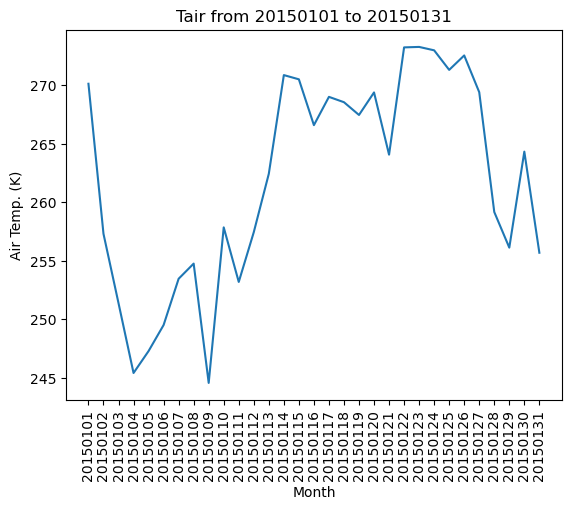

In [5]:
plt.plot(dates, datapoints)
plt.title(var + ' from ' + dates[0] + ' to ' + dates[-1])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Air Temp. (K)')